In [1]:
# =============================================================================
# NOTEBOOK 06 : ÉVALUATION DÉTAILLÉE DU MODÈLE
# =============================================================================
# Objectif : Évaluer le modèle avec toutes les métriques standards
#            Matrice de confusion, ROC, AUC, Classification report
# =============================================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# TensorFlow et Keras
import tensorflow as tf
from tensorflow import keras

# Métriques sklearn
from sklearn.metrics import (
    confusion_matrix, 
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    auc,
    roc_auc_score
)
from sklearn.preprocessing import label_binarize

print("="*70)
print("📊 ÉVALUATION DÉTAILLÉE DU MODÈLE CNN")
print("="*70)

print(f"\n📦 Versions :")
print(f"   - TensorFlow : {tf.__version__}")
print(f"   - Keras      : {keras.__version__}")

print(f"\n⏳ Chargement des données et du modèle...\n")

# Charger les données de test
X_test = np.load('data/processed/X_test.npy')
y_test = np.load('data/processed/y_test.npy')

print(f"✅ Données de test chargées")
print(f"   - X_test : {X_test.shape}")
print(f"   - y_test : {y_test.shape}")

# Charger le modèle entraîné
model = keras.models.load_model('models/gesture_model_final.keras')

print(f"\n✅ Modèle chargé")
print(f"   - Fichier : models/gesture_model_final.keras")
print(f"   - Paramètres : {model.count_params():,}")

# Noms des classes
noms_classes = {
    0: "Poing fermé",
    1: "Paume ouverte",
    2: "Victoire (V)"
}

classes_labels = ["Poing", "Paume", "Victoire"]

📊 ÉVALUATION DÉTAILLÉE DU MODÈLE CNN

📦 Versions :
   - TensorFlow : 2.20.0
   - Keras      : 3.10.0

⏳ Chargement des données et du modèle...

✅ Données de test chargées
   - X_test : (300, 28, 28, 1)
   - y_test : (300,)

✅ Modèle chargé
   - Fichier : models/gesture_model_final.keras
   - Paramètres : 256,707


In [2]:
# =============================================================================
# GÉNÉRATION DES PRÉDICTIONS
# =============================================================================

print("\n" + "="*70)
print("🔮 GÉNÉRATION DES PRÉDICTIONS")
print("="*70)

print(f"\n⏳ Prédiction en cours...\n")

# Obtenir les probabilités pour chaque classe
y_pred_proba = model.predict(X_test, verbose=1)

# Obtenir les classes prédites (argmax)
y_pred = np.argmax(y_pred_proba, axis=1)

print(f"\n✅ Prédictions générées")
print(f"   - Probabilités : {y_pred_proba.shape}")
print(f"   - Prédictions  : {y_pred.shape}")

# Calculer l'accuracy globale
accuracy = accuracy_score(y_test, y_pred)

print(f"\n🎯 Accuracy globale : {accuracy:.4f} ({accuracy*100:.2f}%)")

# Distribution des prédictions
print(f"\n📊 Distribution des prédictions :")
unique_pred, counts_pred = np.unique(y_pred, return_counts=True)
unique_true, counts_true = np.unique(y_test, return_counts=True)

print(f"\n   {'Classe':<20} {'Vrais':<10} {'Prédits':<10}")
print(f"   {'-'*40}")
for classe in range(3):
    vrai = counts_true[np.where(unique_true == classe)[0][0]] if classe in unique_true else 0
    pred = counts_pred[np.where(unique_pred == classe)[0][0]] if classe in unique_pred else 0
    print(f"   {noms_classes[classe]:<20} {vrai:<10} {pred:<10}")


🔮 GÉNÉRATION DES PRÉDICTIONS

⏳ Prédiction en cours...

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

✅ Prédictions générées
   - Probabilités : (300, 3)
   - Prédictions  : (300,)

🎯 Accuracy globale : 1.0000 (100.00%)

📊 Distribution des prédictions :

   Classe               Vrais      Prédits   
   ----------------------------------------
   Poing fermé          100        100       
   Paume ouverte        100        100       
   Victoire (V)         100        100       



🔢 MATRICE DE CONFUSION

📊 Matrice de confusion (valeurs brutes) :
[[100   0   0]
 [  0 100   0]
 [  0   0 100]]

📊 Matrice de confusion (normalisée) :
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


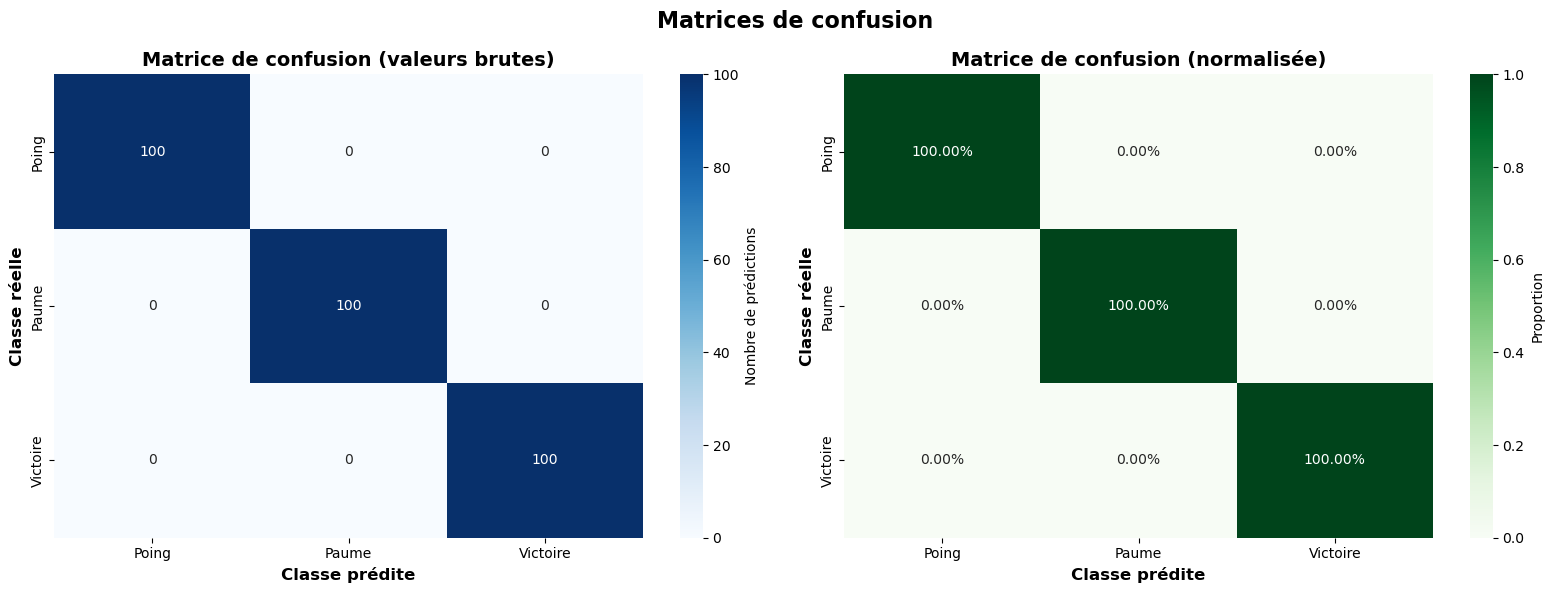


✅ Matrice de confusion sauvegardée : results/plots/matrice_confusion.png

📊 Analyse par classe :

   Poing fermé :
      - Correct   : 100/100
      - Accuracy  : 100.00%

   Paume ouverte :
      - Correct   : 100/100
      - Accuracy  : 100.00%

   Victoire (V) :
      - Correct   : 100/100
      - Accuracy  : 100.00%


In [3]:
# =============================================================================
# MATRICE DE CONFUSION
# =============================================================================

print("\n" + "="*70)
print("🔢 MATRICE DE CONFUSION")
print("="*70)

# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

print(f"\n📊 Matrice de confusion (valeurs brutes) :")
print(cm)

# Calculer la matrice normalisée (en pourcentages)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print(f"\n📊 Matrice de confusion (normalisée) :")
print(cm_normalized)

# Visualisation
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Matrices de confusion', fontsize=16, fontweight='bold')

# Matrice 1 : Valeurs brutes
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=classes_labels,
    yticklabels=classes_labels,
    cbar_kws={'label': 'Nombre de prédictions'},
    ax=axes[0]
)
axes[0].set_xlabel('Classe prédite', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Classe réelle', fontsize=12, fontweight='bold')
axes[0].set_title('Matrice de confusion (valeurs brutes)', fontsize=14, fontweight='bold')

# Matrice 2 : Pourcentages
sns.heatmap(
    cm_normalized,
    annot=True,
    fmt='.2%',
    cmap='Greens',
    xticklabels=classes_labels,
    yticklabels=classes_labels,
    cbar_kws={'label': 'Proportion'},
    ax=axes[1]
)
axes[1].set_xlabel('Classe prédite', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Classe réelle', fontsize=12, fontweight='bold')
axes[1].set_title('Matrice de confusion (normalisée)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('results/plots/matrice_confusion.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\n✅ Matrice de confusion sauvegardée : results/plots/matrice_confusion.png")

# Analyse par classe
print(f"\n📊 Analyse par classe :")
for i, classe in enumerate(classes_labels):
    correct = cm[i, i]
    total = cm[i, :].sum()
    accuracy_classe = (correct / total) * 100 if total > 0 else 0
    
    print(f"\n   {noms_classes[i]} :")
    print(f"      - Correct   : {correct}/{total}")
    print(f"      - Accuracy  : {accuracy_classe:.2f}%")
    
    # Erreurs
    erreurs = []
    for j in range(3):
        if i != j and cm[i, j] > 0:
            erreurs.append(f"{cm[i, j]} prédits comme {classes_labels[j]}")
    
    if erreurs:
        print(f"      - Erreurs   : {', '.join(erreurs)}")


📊 MÉTRIQUES DÉTAILLÉES

📊 Métriques par classe :

   Classe               Precision    Recall       F1-Score    
   --------------------------------------------------------
   Poing fermé          1.0000       1.0000       1.0000      
   Paume ouverte        1.0000       1.0000       1.0000      
   Victoire (V)         1.0000       1.0000       1.0000      
   --------------------------------------------------------
   Moyenne (weighted)   1.0000       1.0000       1.0000      

💡 Explications :
   - Precision : Sur toutes les prédictions de cette classe, combien sont correctes ?
   - Recall    : Sur tous les vrais exemples de cette classe, combien sont trouvés ?
   - F1-Score  : Moyenne harmonique de Precision et Recall


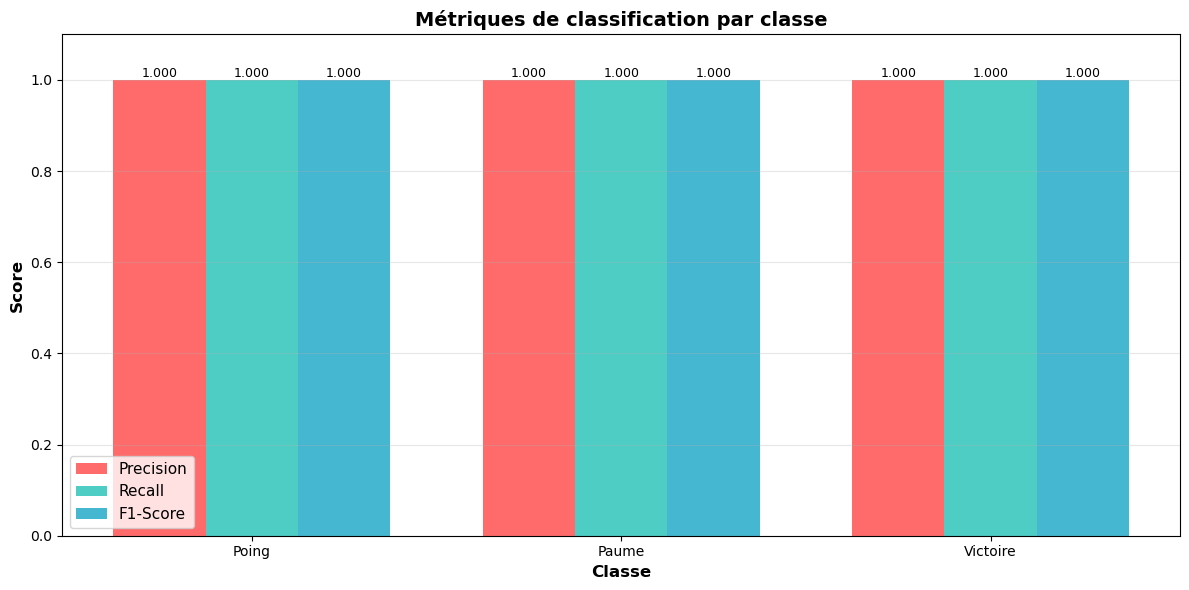


✅ Métriques sauvegardées : results/plots/metriques_par_classe.png


In [4]:
# =============================================================================
# MÉTRIQUES DÉTAILLÉES : PRECISION, RECALL, F1-SCORE
# =============================================================================

print("\n" + "="*70)
print("📊 MÉTRIQUES DÉTAILLÉES")
print("="*70)

# Calculer les métriques pour chaque classe
precision_per_class = precision_score(y_test, y_pred, average=None)
recall_per_class = recall_score(y_test, y_pred, average=None)
f1_per_class = f1_score(y_test, y_pred, average=None)

# Métriques globales (moyennes)
precision_avg = precision_score(y_test, y_pred, average='weighted')
recall_avg = recall_score(y_test, y_pred, average='weighted')
f1_avg = f1_score(y_test, y_pred, average='weighted')

print(f"\n📊 Métriques par classe :")
print(f"\n   {'Classe':<20} {'Precision':<12} {'Recall':<12} {'F1-Score':<12}")
print(f"   {'-'*56}")

for i, classe in enumerate(classes_labels):
    print(f"   {noms_classes[i]:<20} {precision_per_class[i]:<12.4f} {recall_per_class[i]:<12.4f} {f1_per_class[i]:<12.4f}")

print(f"   {'-'*56}")
print(f"   {'Moyenne (weighted)':<20} {precision_avg:<12.4f} {recall_avg:<12.4f} {f1_avg:<12.4f}")

print(f"\n💡 Explications :")
print(f"   - Precision : Sur toutes les prédictions de cette classe, combien sont correctes ?")
print(f"   - Recall    : Sur tous les vrais exemples de cette classe, combien sont trouvés ?")
print(f"   - F1-Score  : Moyenne harmonique de Precision et Recall")

# Visualisation des métriques
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(classes_labels))
width = 0.25

bars1 = ax.bar(x - width, precision_per_class, width, label='Precision', color='#FF6B6B')
bars2 = ax.bar(x, recall_per_class, width, label='Recall', color='#4ECDC4')
bars3 = ax.bar(x + width, f1_per_class, width, label='F1-Score', color='#45B7D1')

ax.set_xlabel('Classe', fontsize=12, fontweight='bold')
ax.set_ylabel('Score', fontsize=12, fontweight='bold')
ax.set_title('Métriques de classification par classe', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(classes_labels)
ax.legend(fontsize=11)
ax.set_ylim([0, 1.1])
ax.grid(axis='y', alpha=0.3)

# Ajouter les valeurs sur les barres
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig('results/plots/metriques_par_classe.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\n✅ Métriques sauvegardées : results/plots/metriques_par_classe.png")


📋 CLASSIFICATION REPORT

              precision    recall  f1-score   support

       Poing     1.0000    1.0000    1.0000       100
       Paume     1.0000    1.0000    1.0000       100
    Victoire     1.0000    1.0000    1.0000       100

    accuracy                         1.0000       300
   macro avg     1.0000    1.0000    1.0000       300
weighted avg     1.0000    1.0000    1.0000       300

✅ Rapport sauvegardé : results/metrics/classification_report.csv


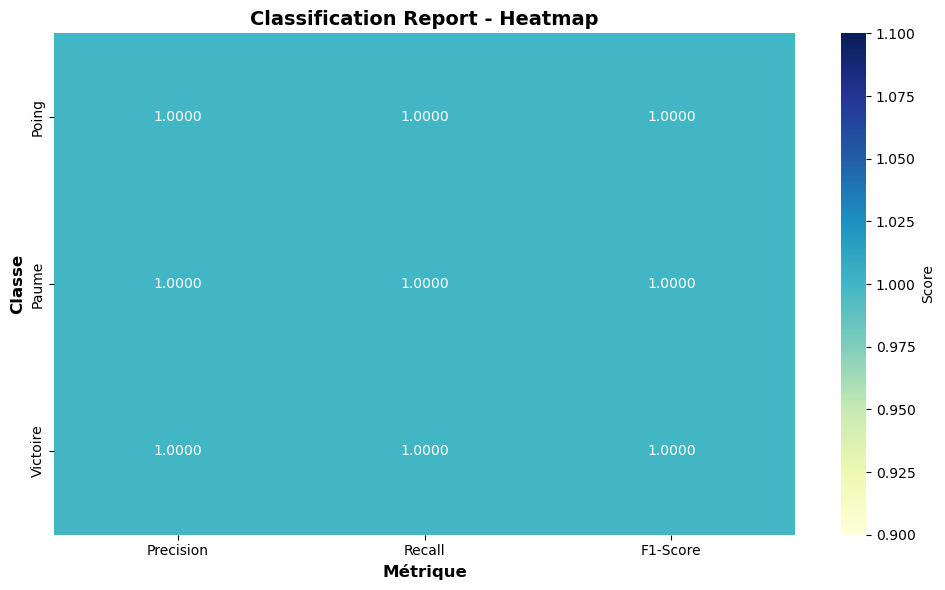

✅ Heatmap sauvegardée : results/plots/classification_report_heatmap.png


In [5]:
# =============================================================================
# CLASSIFICATION REPORT
# =============================================================================

print("\n" + "="*70)
print("📋 CLASSIFICATION REPORT")
print("="*70)

# Générer le rapport de classification
report = classification_report(
    y_test, 
    y_pred, 
    target_names=classes_labels,
    digits=4
)

print(f"\n{report}")

# Sauvegarder le rapport
report_dict = classification_report(
    y_test, 
    y_pred, 
    target_names=classes_labels,
    output_dict=True
)

report_df = pd.DataFrame(report_dict).transpose()
report_df.to_csv('results/metrics/classification_report.csv')

print(f"✅ Rapport sauvegardé : results/metrics/classification_report.csv")

# Visualisation du rapport sous forme de heatmap
fig, ax = plt.subplots(figsize=(10, 6))

# Extraire les données pertinentes
metrics_data = []
for classe in classes_labels:
    metrics_data.append([
        report_dict[classe]['precision'],
        report_dict[classe]['recall'],
        report_dict[classe]['f1-score']
    ])

metrics_array = np.array(metrics_data)

sns.heatmap(
    metrics_array,
    annot=True,
    fmt='.4f',
    cmap='YlGnBu',
    xticklabels=['Precision', 'Recall', 'F1-Score'],
    yticklabels=classes_labels,
    cbar_kws={'label': 'Score'},
    ax=ax
)

ax.set_title('Classification Report - Heatmap', fontsize=14, fontweight='bold')
ax.set_xlabel('Métrique', fontsize=12, fontweight='bold')
ax.set_ylabel('Classe', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('results/plots/classification_report_heatmap.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"✅ Heatmap sauvegardée : results/plots/classification_report_heatmap.png")


📈 COURBES ROC ET AUC

📊 AUC (Area Under Curve) par classe :
   Poing fermé          : 1.0000
   Paume ouverte        : 1.0000
   Victoire (V)         : 1.0000

📊 AUC moyennes :
   Micro-average : 1.0000
   Macro-average : 1.0000


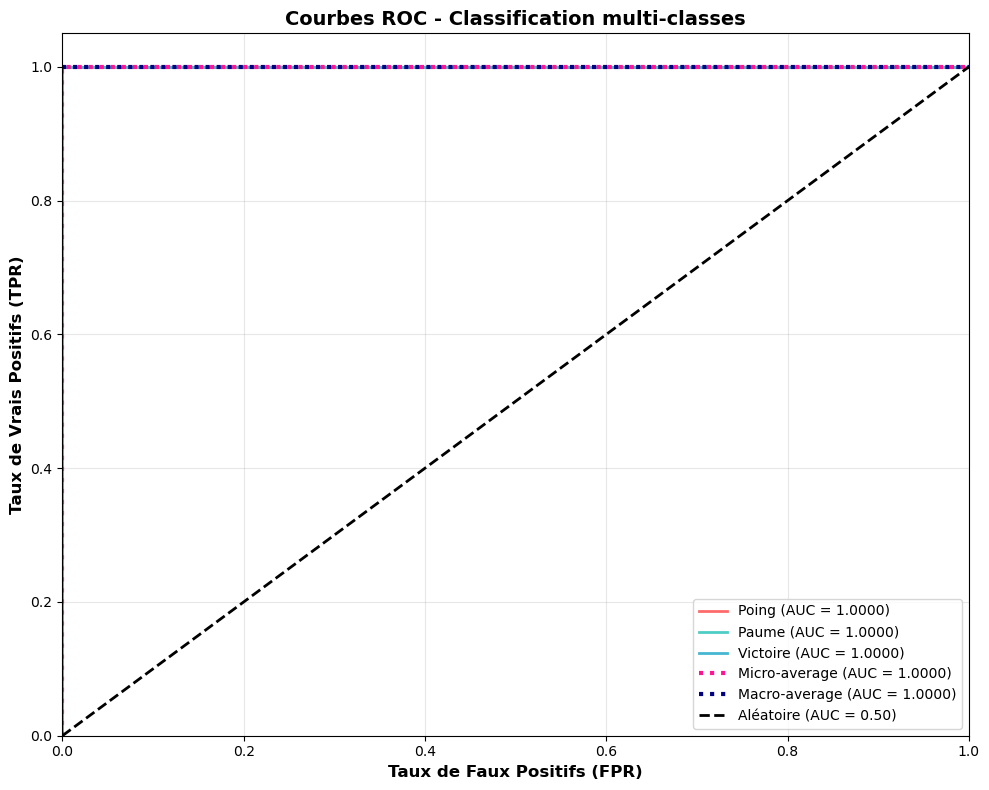


✅ Courbes ROC sauvegardées : results/plots/courbes_roc.png

💡 Interprétation de l'AUC :
   - AUC = 1.0  : Classificateur parfait
   - AUC = 0.9+ : Excellent
   - AUC = 0.8+ : Bon
   - AUC = 0.7+ : Acceptable
   - AUC = 0.5  : Aléatoire (comme lancer une pièce)


In [6]:
# =============================================================================
# COURBES ROC ET AUC
# =============================================================================

print("\n" + "="*70)
print("📈 COURBES ROC ET AUC")
print("="*70)

# Binariser les labels pour ROC multiclasse
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_binarized.shape[1]

# Calculer ROC et AUC pour chaque classe
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Calculer micro-average ROC
fpr["micro"], tpr["micro"], _ = roc_curve(
    y_test_binarized.ravel(), 
    y_pred_proba.ravel()
)
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Calculer macro-average ROC
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

print(f"\n📊 AUC (Area Under Curve) par classe :")
for i in range(n_classes):
    print(f"   {noms_classes[i]:<20} : {roc_auc[i]:.4f}")

print(f"\n📊 AUC moyennes :")
print(f"   Micro-average : {roc_auc['micro']:.4f}")
print(f"   Macro-average : {roc_auc['macro']:.4f}")

# Visualisation des courbes ROC
fig, ax = plt.subplots(figsize=(10, 8))

# Courbes par classe
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
for i, color in zip(range(n_classes), colors):
    ax.plot(
        fpr[i], tpr[i], 
        color=color, 
        lw=2,
        label=f'{classes_labels[i]} (AUC = {roc_auc[i]:.4f})'
    )

# Courbe micro-average
ax.plot(
    fpr["micro"], tpr["micro"],
    label=f'Micro-average (AUC = {roc_auc["micro"]:.4f})',
    color='deeppink', 
    linestyle=':', 
    linewidth=3
)

# Courbe macro-average
ax.plot(
    fpr["macro"], tpr["macro"],
    label=f'Macro-average (AUC = {roc_auc["macro"]:.4f})',
    color='navy', 
    linestyle=':', 
    linewidth=3
)

# Ligne de référence (classificateur aléatoire)
ax.plot([0, 1], [0, 1], 'k--', lw=2, label='Aléatoire (AUC = 0.50)')

ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('Taux de Faux Positifs (FPR)', fontsize=12, fontweight='bold')
ax.set_ylabel('Taux de Vrais Positifs (TPR)', fontsize=12, fontweight='bold')
ax.set_title('Courbes ROC - Classification multi-classes', fontsize=14, fontweight='bold')
ax.legend(loc="lower right", fontsize=10)
ax.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('results/plots/courbes_roc.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\n✅ Courbes ROC sauvegardées : results/plots/courbes_roc.png")

print(f"\n💡 Interprétation de l'AUC :")
print(f"   - AUC = 1.0  : Classificateur parfait")
print(f"   - AUC = 0.9+ : Excellent")
print(f"   - AUC = 0.8+ : Bon")
print(f"   - AUC = 0.7+ : Acceptable")
print(f"   - AUC = 0.5  : Aléatoire (comme lancer une pièce)")

In [7]:
# =============================================================================
# ANALYSE DES ERREURS
# =============================================================================

print("\n" + "="*70)
print("🔍 ANALYSE DES ERREURS")
print("="*70)

# Identifier les prédictions incorrectes
erreurs_indices = np.where(y_test != y_pred)[0]
nb_erreurs = len(erreurs_indices)

print(f"\n📊 Statistiques des erreurs :")
print(f"   - Total erreurs       : {nb_erreurs}/{len(y_test)} ({nb_erreurs/len(y_test)*100:.2f}%)")
print(f"   - Prédictions correctes : {len(y_test) - nb_erreurs}/{len(y_test)} ({(1 - nb_erreurs/len(y_test))*100:.2f}%)")

if nb_erreurs > 0:
    # Analyser les types d'erreurs
    print(f"\n📊 Types d'erreurs :")
    erreur_counts = {}
    
    for idx in erreurs_indices:
        vrai = y_test[idx]
        pred = y_pred[idx]
        erreur_type = f"{classes_labels[vrai]} → {classes_labels[pred]}"
        
        if erreur_type not in erreur_counts:
            erreur_counts[erreur_type] = 0
        erreur_counts[erreur_type] += 1
    
    for erreur_type, count in sorted(erreur_counts.items(), key=lambda x: x[1], reverse=True):
        print(f"   {erreur_type:<30} : {count} fois")
    
    # Visualiser quelques erreurs
    n_erreurs_viz = min(10, nb_erreurs)
    erreurs_sample = np.random.choice(erreurs_indices, n_erreurs_viz, replace=False)
    
    fig, axes = plt.subplots(2, 5, figsize=(20, 8))
    fig.suptitle(f'Exemples d\'erreurs de classification ({n_erreurs_viz}/{nb_erreurs})', 
                 fontsize=16, fontweight='bold')
    
    for idx, err_idx in enumerate(erreurs_sample):
        row = idx // 5
        col = idx % 5
        
        image = X_test[err_idx, :, :, 0]
        vrai_classe = y_test[err_idx]
        pred_classe = y_pred[err_idx]
        confiance = y_pred_proba[err_idx, pred_classe] * 100
        
        axes[row, col].imshow(image, cmap='gray')
        axes[row, col].set_title(
            f"Vrai: {classes_labels[vrai_classe]}\n"
            f"Prédit: {classes_labels[pred_classe]}\n"
            f"Confiance: {confiance:.1f}%",
            fontsize=10,
            color='red'
        )
        axes[row, col].axis('off')
    
    plt.tight_layout()
    plt.savefig('results/plots/analyse_erreurs.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    print(f"\n✅ Analyse des erreurs sauvegardée : results/plots/analyse_erreurs.png")
else:
    print(f"\n🎉 Aucune erreur ! Classification parfaite !")


🔍 ANALYSE DES ERREURS

📊 Statistiques des erreurs :
   - Total erreurs       : 0/300 (0.00%)
   - Prédictions correctes : 300/300 (100.00%)

🎉 Aucune erreur ! Classification parfaite !


In [8]:
# =============================================================================
# RÉSUMÉ FINAL ET EXPORT DES RÉSULTATS
# =============================================================================

print("\n" + "="*70)
print("📊 RÉSUMÉ FINAL DE L'ÉVALUATION")
print("="*70)

# Créer un résumé complet
resume = {
    'Modèle': 'CNN_Gestes',
    'Dataset': 'Test Set',
    'Nombre_exemples': len(y_test),
    'Accuracy': accuracy,
    'Precision_weighted': precision_avg,
    'Recall_weighted': recall_avg,
    'F1_Score_weighted': f1_avg,
    'AUC_micro': roc_auc['micro'],
    'AUC_macro': roc_auc['macro'],
    'Nombre_erreurs': nb_erreurs,
    'Taux_erreur': nb_erreurs / len(y_test)
}

# Afficher le résumé
print(f"\n📋 Résumé des performances :")
print(f"\n   {'Métrique':<25} {'Valeur':<15}")
print(f"   {'-'*40}")
for key, value in resume.items():
    if isinstance(value, float):
        if key.startswith('Taux'):
            print(f"   {key.replace('_', ' '):<25} {value:.4f} ({value*100:.2f}%)")
        else:
            print(f"   {key.replace('_', ' '):<25} {value:.4f}")
    else:
        print(f"   {key.replace('_', ' '):<25} {value}")

# Sauvegarder le résumé
resume_df = pd.DataFrame([resume])
resume_df.to_csv('results/metrics/evaluation_summary.csv', index=False)

print(f"\n✅ Résumé sauvegardé : results/metrics/evaluation_summary.csv")

# Liste de tous les fichiers générés
print(f"\n📁 Fichiers générés lors de l'évaluation :")
fichiers_evaluation = [
    'results/metrics/classification_report.csv',
    'results/metrics/evaluation_summary.csv',
    'results/plots/matrice_confusion.png',
    'results/plots/metriques_par_classe.png',
    'results/plots/classification_report_heatmap.png',
    'results/plots/courbes_roc.png',
    'results/plots/analyse_erreurs.png'
]

for fichier in fichiers_evaluation:
    if os.path.exists(fichier):
        taille = os.path.getsize(fichier) / 1024
        print(f"   ✅ {fichier} ({taille:.1f} KB)")
    else:
        print(f"   ⚠️ {fichier} (non généré)")

print(f"\n" + "="*70)
print("🎉 ÉVALUATION COMPLÈTE TERMINÉE")
print("="*70)

print(f"\n🎯 Conclusions :")

if accuracy >= 0.95:
    print(f"   ✅ Performance EXCELLENTE (Accuracy ≥ 95%)")
elif accuracy >= 0.90:
    print(f"   ✅ Performance TRÈS BONNE (Accuracy ≥ 90%)")
elif accuracy >= 0.85:
    print(f"   ⚠️ Performance CORRECTE (Accuracy ≥ 85%)")
else:
    print(f"   ⚠️ Performance À AMÉLIORER (Accuracy < 85%)")

if roc_auc['macro'] >= 0.95:
    print(f"   ✅ Excellent pouvoir de discrimination (AUC ≥ 0.95)")
elif roc_auc['macro'] >= 0.90:
    print(f"   ✅ Très bon pouvoir de discrimination (AUC ≥ 0.90)")

print(f"\n➡️ Prochaine étape : 07_realtime_inference.ipynb")
print(f"   Test du modèle en temps réel avec la webcam")


📊 RÉSUMÉ FINAL DE L'ÉVALUATION

📋 Résumé des performances :

   Métrique                  Valeur         
   ----------------------------------------
   Modèle                    CNN_Gestes
   Dataset                   Test Set
   Nombre exemples           300
   Accuracy                  1.0000
   Precision weighted        1.0000
   Recall weighted           1.0000
   F1 Score weighted         1.0000
   AUC micro                 1.0000
   AUC macro                 1.0000
   Nombre erreurs            0
   Taux erreur               0.0000 (0.00%)

✅ Résumé sauvegardé : results/metrics/evaluation_summary.csv

📁 Fichiers générés lors de l'évaluation :
   ✅ results/metrics/classification_report.csv (0.2 KB)
   ✅ results/metrics/evaluation_summary.csv (0.2 KB)
   ✅ results/plots/matrice_confusion.png (89.0 KB)
   ✅ results/plots/metriques_par_classe.png (42.1 KB)
   ✅ results/plots/classification_report_heatmap.png (53.0 KB)
   ✅ results/plots/courbes_roc.png (108.5 KB)
   ⚠️ results/plots